# Using the Unsupervised Tuning Methods

In this notebook you can find a number of examples of how to use the unsupervied tuning methods. Note the examples rely on the iris data set which can be loaded in directly from the Eagle_ML package.

Currently impletmented clustering models include:
- "kmeans"
- "agglomerativeclustering"
- "dbscan"

However a non-supported model can be passed in as long as it follows the sklearn fit_transform methodology.

In [1]:
from eagles.Unsupervised import unsupervised_tuner as ut
from eagles.data_sets import data_loader as dl

Load in the iris data set and set the columns that will be used for clustering examples

In [2]:
iris = dl.load_iris()
print(iris.shape)
ft_cols = [col for col in iris.columns if col != 'species']
print(ft_cols)

(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


## Using the find_optimal_clusters() functions

This function allows the user to pass in the datat to be clustered and finds an "optimal" number of clusters. When using kmeans or agglomerative clusters the metrics that can be used to find the optimal number of clusters include:
- max_sil: Determines the optimal number of cluster by finding the number of clusters that results in the max silhouette score 
- knee_sil: Determines the optimal number of clusters by using the KneeLocator method provided by the kneed package on the silhouette scores as compared to the number of clusters.
- knee_wss: Determines the optimal number of clusters by using the KneeLocator method provided by the kneed package on the WSS as compared to the number of clusters.

When DBSCAN is used the optimal number of clusters is determined by the method itself. 

Random Seed Value: 4


<Figure size 720x720 with 0 Axes>

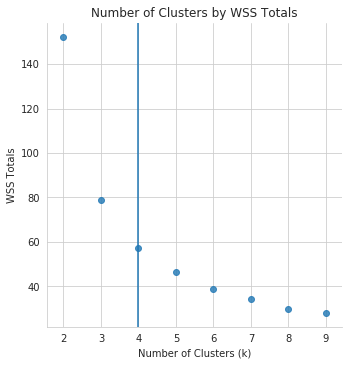

Optimal number of clusters: 4


Silhouette Score: 0.72
WSS Total: 57.32

Number of Observations per Cluster
1    50
0    40
2    32
3    28
Name: Cluster, dtype: int64


Base Cluster Stats 

Cluster               0     1     2     3
sepal_length mean  6.25  5.01  6.91  5.53
             std   0.34  0.35  0.50  0.32
             max   7.00  5.80  7.90  6.10
sepal_width  mean  2.85  3.42  3.10  2.64
             std   0.28  0.38  0.30  0.27
             max   3.40  4.40  3.80  3.00
petal_length mean  4.81  1.46  5.85  3.96
             std   0.29  0.17  0.45  0.39
             max   5.60  1.90  6.90  4.50
petal_width  mean  1.62  0.24  2.13  1.23
             std   0.27  0.11  0.24  0.19
             max   2.40  0.60  2.50  1.70
Cluster      mean  0.00  1.00  2.00  3.00
             std   0.00  0.00  0.00  0.00
             max   0.00  1.00  2.00  3.00



Significance Testing Results 

        Feature          p Val  Effect Size
0  sepal_length   9.234311e-50     0.793243
1   sepal_width

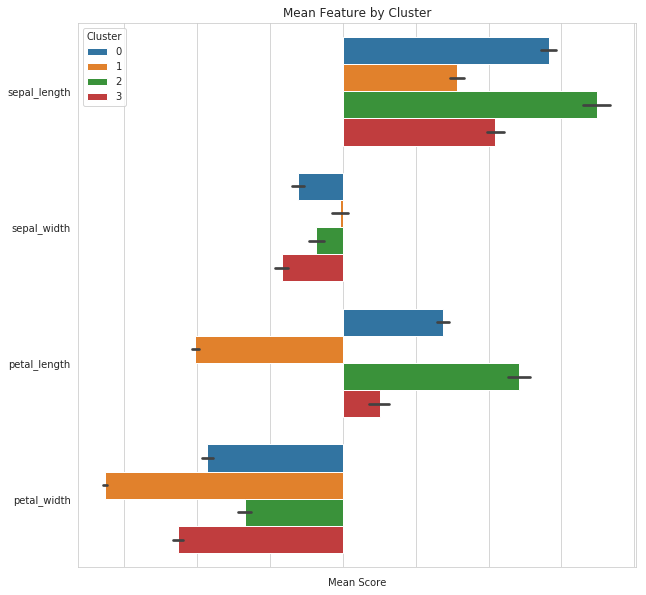

<Figure size 720x720 with 0 Axes>

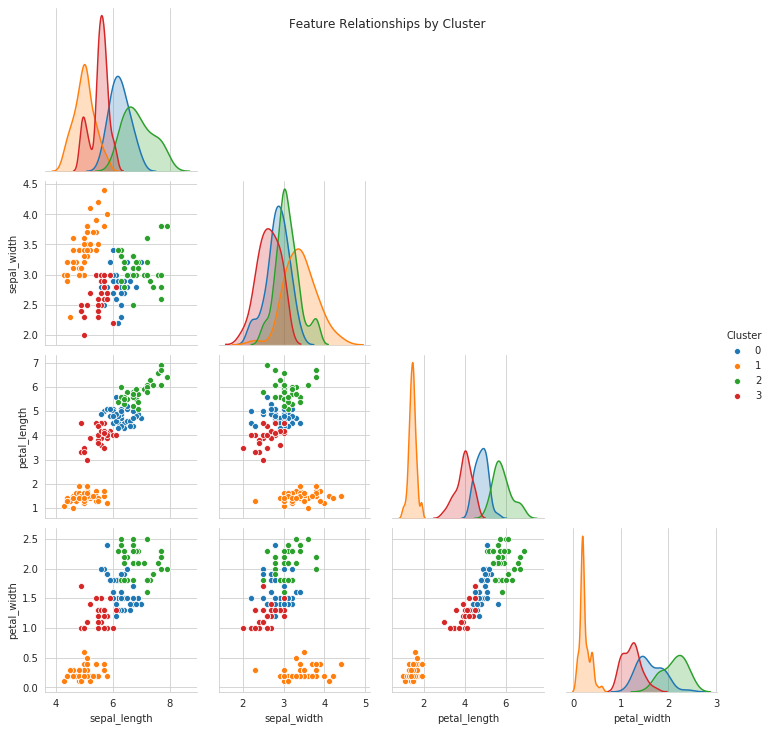

In [3]:
data = ut.find_optimal_clusters(
    data=iris,
    ft_cols=ft_cols,
    cluster_method="kmeans",
    metric="knee_wss",
    min_num_clusters=2,
    max_num_clusters=10,
    params={},
    scale=None,
    plot_dims=[],
    summary_stats=['mean','std','max'],
    run_stat_comps=True,
    plot_scale='standard',
    random_seed=4
)